### Sentiment effect  


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# set plot type
plt.rcParams['figure.figsize'] = (16, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False # show minus

In [34]:
df_s = pd.read_csv('news_CNBC.csv')
df_s.head()

,Unnamed: 0,Unnamed: 0.1,Title,Time,Content,Link,Date,positive,negative,positive_std,negative_std,test
0,0,0,"Sears just opened a new store, here's what it ...","Published Fri, May 24 2019 8:27 AM EDT","Like many suburban shopping areas, Overland Pa...",https://www.cnbc.com/2019/05/24/sears-just-ope...,2019-05-24,0.037013,0.564442,-0.211516,0.538001,NaN
1,1,1,Novartis' gene therapy Zolgensma will cost $2....,"Published Fri, May 24 2019 1:03 PM EDT",The Food and Drug Administration on Friday app...,https://www.cnbc.com/2019/05/24/fda-approves-n...,2019-05-24,0.052434,0.537453,0.796086,-0.071784,NaN
2,2,2,United extends Boeing 737 Max cancellations th...,"Published Fri, May 24 2019 1:00 PM EDT",United Airlines will take its 14 Boeing 737 Ma...,https://www.cnbc.com/2019/05/24/united-extends...,2019-05-24,0.029661,0.567797,-0.691834,0.613807,0.796086
3,3,3,'Sonic the Hedgehog' movie release pushed to F...,"Published Fri, May 24 2019 12:39 PM EDT",It seems Paramount Pictures needed more than f...,https://www.cnbc.com/2019/05/24/sonic-the-hedg...,2019-05-24,0.036630,0.512821,-0.236508,-0.628344,NaN
4,4,4,Trump administration to roll back health prote...,"Published Fri, May 24 2019 10:53 AM EDT",The Trump administration on Friday rolled back...,https://www.cnbc.com/2019/05/24/trump-administ...,2019-05-24,0.017094,0.653846,-1.512909,2.558045,NaN


In [43]:
df_p = pd.read_csv('industry_etf_bydate.csv')
df_p['Date'] = df_p['date']
df_p = df_p.set_index('date')
df_p = df_p.drop(['Unnamed: 0'], axis=1)

df_p.head()

,Symbols,open,high,low,close,volume,Date
date,,,,,,,
2015-05-01,DIA,163.1623,163.8906,162.9528,163.7905,3895734,2015-05-01
2015-05-01,IBB,112.1416,114.0600,111.8950,113.8780,7509189,2015-05-01
2015-05-01,IHE,159.5720,161.3193,159.5720,161.2154,52208,2015-05-01
2015-05-01,IVV,193.3584,194.6242,193.2575,194.5600,2983091,2015-05-01
2015-05-01,IYC,137.3856,138.9029,137.3856,138.9029,54411,2015-05-01


In [44]:
def sort_s():
    df = pd.DataFrame({'negative':df_s['negative'].groupby(df_s['Date']).mean(),
                    'positive':df_s['positive'].groupby(df_s['Date']).mean(),
                    'neg_std':df_s['negative_std'].groupby(df_s['Date']).mean(),
                    'pos_std':df_s['positive_std'].groupby(df_s['Date']).mean()})
                    #'high_neg':neg_std[neg_std>0.4],'high_pos':pos_std[pos_std>0.4]
    df['high_neg'] = df['neg_std'][df['neg_std']>0.4]
    df['high_pos'] = df['pos_std'][df['pos_std']>0.4]
    return df

sort_s().head()

,negative,positive,neg_std,pos_std,high_neg,high_pos
Date,,,,,,
2014-07-01,0.539014,0.034908,-0.036510,-0.349045,NaN,NaN
2014-11-21,0.523342,0.046683,-0.390628,0.420313,NaN,0.420313
2016-08-02,0.616667,0.033333,1.717997,-0.451901,1.717997,NaN
2016-08-18,0.515723,0.028931,-0.562758,-0.739543,NaN,NaN
2016-08-29,0.543762,0.027933,0.070752,-0.804738,NaN,NaN


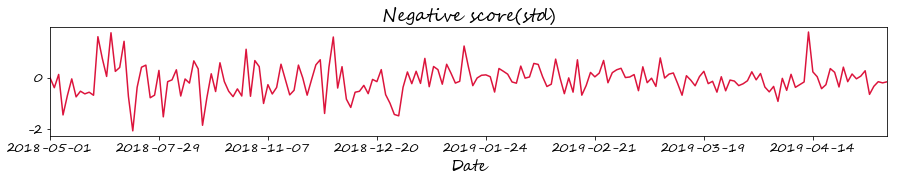

In [45]:
plt.figure(figsize=(15,2))
plt.title('Negative score(std)')
sort_s()['neg_std'].loc['2018-05-01':'2019-05-01'].plot(color='crimson')

Date
2018-05-01         NaN
2018-05-03         NaN
2018-05-08         NaN
2018-05-16         NaN
2018-05-23   -0.061317
2018-05-25    0.016166
2018-05-29    0.143614
2018-06-06    0.289339
2018-06-07    0.335456
2018-06-12    0.795966
2018-06-14    0.839411
2018-06-21    0.539333
2018-06-26    0.421628
2018-06-28    0.424182
2018-07-03   -0.260137
2018-07-05   -0.480014
2018-07-10   -0.142407
2018-07-11    0.026732
2018-07-12    0.077903
2018-07-19    0.486787
2018-07-22    0.594368
2018-07-23    0.305786
2018-07-26    0.265006
2018-07-27    0.137689
2018-07-28   -0.143113
2018-07-29   -0.167353
2018-07-31    0.031264
2018-08-05   -0.008034
2018-08-09    0.163620
2018-08-15    0.370479
                ...   
2019-04-01    0.186188
2019-04-02    0.161163
2019-04-03    0.240948
2019-04-04    0.307489
2019-04-05    0.438943
2019-04-07    0.254222
2019-04-08    0.200017
2019-04-09    0.028906
2019-04-10    0.009045
2019-04-11   -0.044155
2019-04-12    0.163812
2019-04-13   -0.043612
2019-0

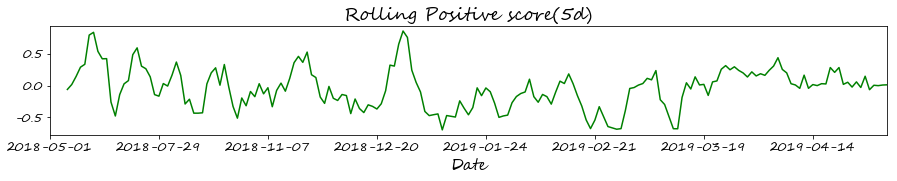

In [46]:
plt.figure(figsize=(15,2))
plt.title('Rolling Positive score(5d)')
roll_pos = sort_s()['pos_std'].loc['2018-05-01':'2019-05-01'].rolling(5).mean()
roll_pos.plot(color='green')
print(roll_pos)

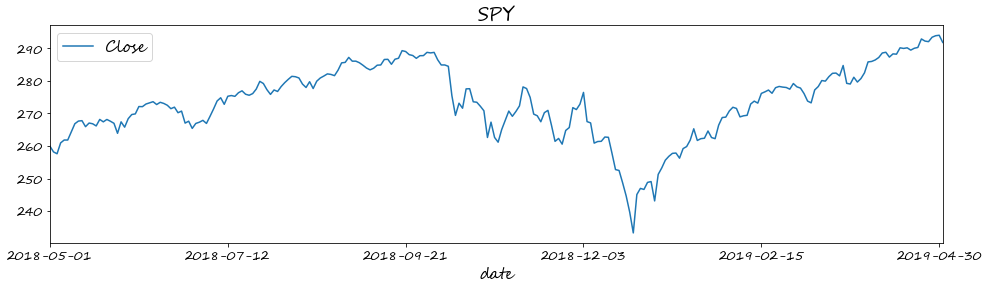

In [47]:
plt.title('SPY')
df_p[df_p['Symbols']=='SPY']['close'].loc['2018-05-01':'2019-05-01'].plot(label='Close')
plt.legend()

In [48]:
d1 = df_p[df_p['Symbols']=='SPY']['close'].loc['2017-05-01':'2019-05-01']
spy_ = pd.merge(d1,sort_s().loc['2017-05-01':'2019-05-01'],how='outer', left_index=True,right_index=True)

print(spy_)

               close  negative  positive   neg_std   pos_std  high_neg  \
2017-05-01  229.7639  0.560284  0.039007  0.444057 -0.081201  0.444057   
2017-05-02  229.8505  0.575730  0.039955  0.793066 -0.019237  0.793066   
2017-05-03  229.5714       NaN       NaN       NaN       NaN       NaN   
2017-05-04  229.8409       NaN       NaN       NaN       NaN       NaN   
2017-05-05  230.7458       NaN       NaN       NaN       NaN       NaN   
2017-05-08  230.7073       NaN       NaN       NaN       NaN       NaN   
2017-05-09  230.4955       NaN       NaN       NaN       NaN       NaN   
2017-05-10  230.9094       NaN       NaN       NaN       NaN       NaN   
2017-05-11  230.4377       NaN       NaN       NaN       NaN       NaN   
2017-05-12  230.0527       NaN       NaN       NaN       NaN       NaN   
2017-05-15  231.3234       NaN       NaN       NaN       NaN       NaN   
2017-05-16  231.1116       NaN       NaN       NaN       NaN       NaN   
2017-05-17  227.0107       NaN       N

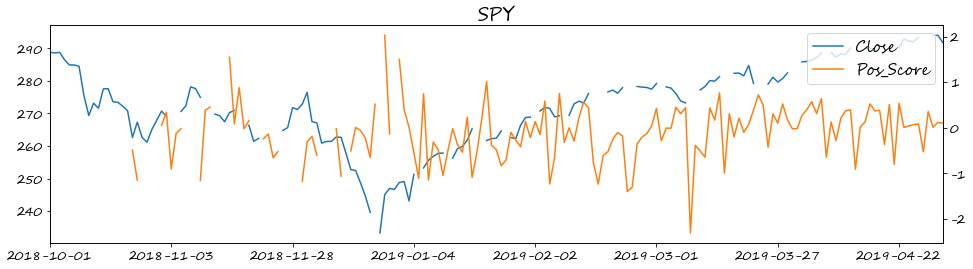

In [49]:
fig=plt.figure()
plt.title('SPY')
spy_['close'].loc['2018-10-01':].plot(label='Close')
spy_['pos_std'].loc['2018-10-01':].plot(secondary_y=True,label='Pos_Score')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

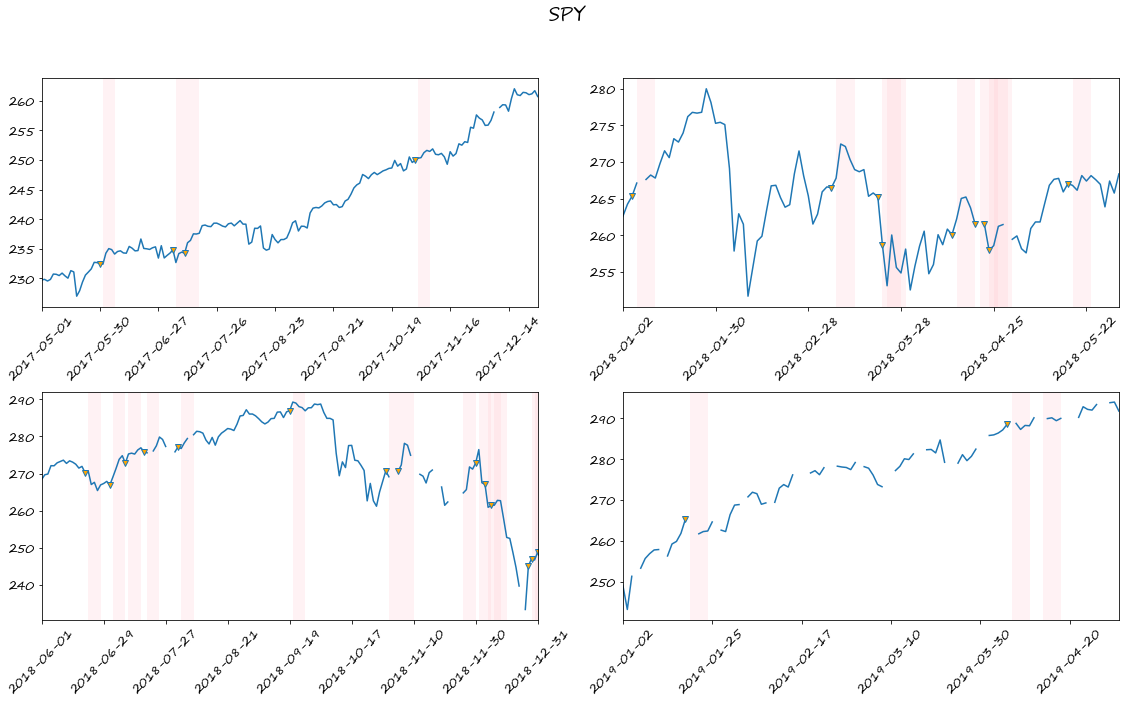

In [50]:

def get_mark_loc(df):
    loc_ = []
    for i in df[abs(df)>0.8].index:
        loc_.append(df.index.get_loc(i))
    return loc_

def highlight(indices,ax):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]+1, indices[i]+5, facecolor='pink', edgecolor='none', alpha=.2)
        i+=1

fig,axes=plt.subplots(2,2,figsize=(16,10))
plt.suptitle('SPY')

def subplot(close,score,ax):
    ax = close.plot(ax=ax,markevery=get_mark_loc(score), marker='v', markerfacecolor='orange')
    highlight(get_mark_loc(score), ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


subplot(spy_['close'].loc['2017-05-01':'2017-12-31'],spy_['neg_std'].loc['2017-05-01':'2017-12-31'],axes[0,0])
subplot(spy_['close'].loc['2018-01-01':'2018-06-01'],spy_['neg_std'].loc['2018-01-01':'2018-06-01'],axes[0,1])
subplot(spy_['close'].loc['2018-06-01':'2018-12-31'],spy_['neg_std'].loc['2018-06-01':'2018-12-31'],axes[1,0])
subplot(spy_['close'].loc['2019-01-01':'2019-05-01'],spy_['neg_std'].loc['2019-01-01':'2019-05-01'],axes[1,1])
plt.tight_layout()
fig.subplots_adjust(top=0.88)

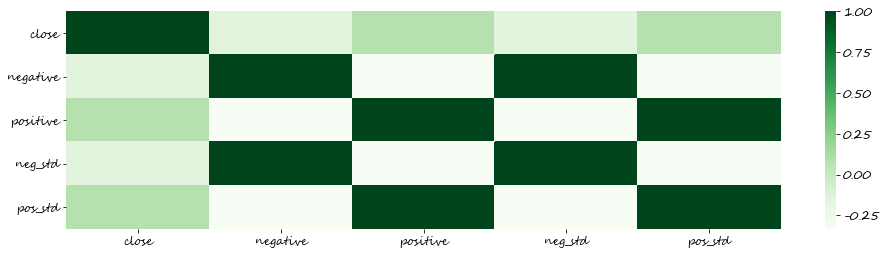

In [51]:
corr_ = spy_.drop(spy_.columns[[5,6]], axis=1).dropna()
import seaborn as sns
corr = corr_.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Greens')#"Blues")

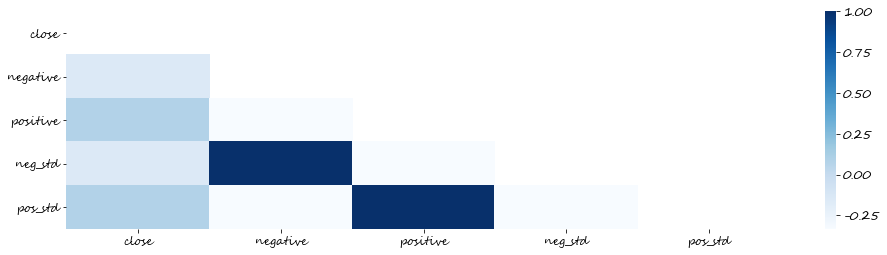

In [94]:
import numpy as np
df_p.index = pd.to_datetime(df_p.index)
# shift close price back 7 days
shift_p = df_p[df_p['Symbols']=='SPY']['close'].loc['2017-05-01':'2019-05-01'].shift(-7, freq='D')
shift_spy = pd.merge(shift_p,sort_s().loc['2017-05-01':'2019-05-01'],how='outer', left_index=True,right_index=True)
shift_spy = shift_spy.drop(shift_spy.columns[[5,6]], axis=1).dropna()
sh_corr = shift_spy.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Blues',mask=mask)#,square=True)